In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/training_set_VU_DM.csv')

In [4]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [25]:
# print the number of distinct values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

srch_id: 199795
date_time: 198615
site_id: 34
visitor_location_country_id: 210
visitor_hist_starrating: 312
visitor_hist_adr_usd: 7799
prop_country_id: 172
prop_id: 129113
prop_starrating: 6
prop_review_score: 10
prop_brand_bool: 2
prop_location_score1: 337
prop_location_score2: 9342
prop_log_historical_price: 392
position: 40
price_usd: 76465
promotion_flag: 2
srch_destination_id: 18127
srch_length_of_stay: 36
srch_booking_window: 429
srch_adults_count: 9
srch_children_count: 10
srch_room_count: 8
srch_saturday_night_bool: 2
srch_query_affinity_score: 199387
orig_destination_distance: 530595
random_bool: 2
comp1_rate: 3
comp1_inv: 3
comp1_rate_percent_diff: 1830
comp2_rate: 3
comp2_inv: 3
comp2_rate_percent_diff: 596
comp3_rate: 3
comp3_inv: 3
comp3_rate_percent_diff: 534
comp4_rate: 3
comp4_inv: 3
comp4_rate_percent_diff: 482
comp5_rate: 3
comp5_inv: 3
comp5_rate_percent_diff: 645
comp6_rate: 3
comp6_inv: 3
comp6_rate_percent_diff: 380
comp7_rate: 3
comp7_inv: 3
comp7_rate_percent_di

In [5]:
# count the number of NaN values in each column
nan_counts = df.isna().sum()

# print the results
print(nan_counts)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [6]:
print(df.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [17]:
nan_cols = df.columns[df.isna().any()].tolist()

# count the number of NaN values in each relevant column
nan_counts = df[nan_cols].isna().sum()/(len(df))*100

# print the results
print(nan_counts)

visitor_hist_starrating      94.920364
visitor_hist_adr_usd         94.897735
prop_review_score             0.148517
prop_location_score2         21.990151
srch_query_affinity_score    93.598552
orig_destination_distance    32.425766
comp1_rate                   97.581250
comp1_inv                    97.387053
comp1_rate_percent_diff      98.095353
comp2_rate                   59.166392
comp2_inv                    57.036710
comp2_rate_percent_diff      88.781786
comp3_rate                   69.056462
comp3_inv                    66.702814
comp3_rate_percent_diff      90.464625
comp4_rate                   93.800797
comp4_inv                    93.069001
comp4_rate_percent_diff      97.356256
comp5_rate                   55.179155
comp5_inv                    52.403089
comp5_rate_percent_diff      83.036706
comp6_rate                   95.156511
comp6_inv                    94.736633
comp6_rate_percent_diff      98.060362
comp7_rate                   93.640058
comp7_inv                

Check if there are hotels that previously had no stars, but later in time have gotten stars for: prop_starrating

In [5]:
df = df.sort_values('date_time')

# Group the DataFrame by 'prop_id'
grouped = df.groupby('prop_id')

# Initialize an empty list to store the changes in prop_starrating
rating_changes = []

# Iterate over each group
for prop_id, group in grouped:
    # Check if there is a change from 0 to a different value in prop_starrating
    zero_to_nonzero = group['prop_starrating'].diff().fillna(0) != 0
    zero_to_nonzero = zero_to_nonzero & (group['prop_starrating'] != 0)
    
    # Get the datetime values when the change occurs
    change_dates = group.loc[zero_to_nonzero, 'date_time']
    
    # Append the prop_id and change_dates to the rating_changes list
    rating_changes.extend([(prop_id, date) for date in change_dates])

# Create a new DataFrame with the changes in prop_starrating
changes_df = pd.DataFrame(rating_changes, columns=['prop_id', 'change_date'])

print(rating_changes)


[]


Also do this for: prop_review_score

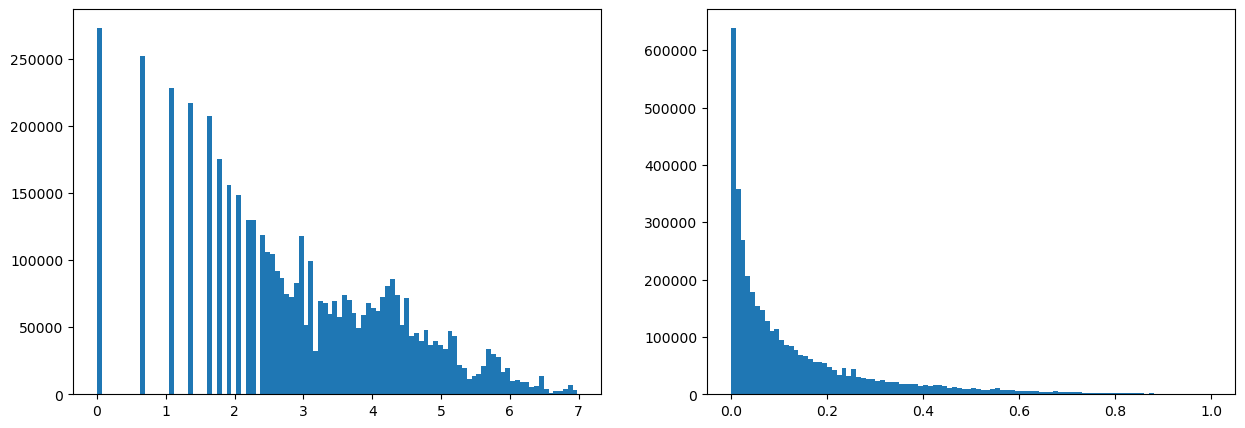

In [50]:
df_location1 = df['prop_location_score1']
df_location2 = df['prop_location_score2']

# plot the histograms
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(df_location1, bins=100)
ax[1].hist(df_location2, bins=100)
plt.show()

In [49]:
# group the dataframe by 'prop_id' and calculate the percentage of rows with NaN values
prop_nan_perc = df.groupby('prop_id')['prop_review_score'].apply(lambda x: x.isna().sum() / len(x))

# calculate the percentage of 'prop_id' where it only contains NaN values
all_nan_perc = (df.groupby('prop_id')['prop_review_score'].apply(lambda x: x.isna().all())).sum() / len(df['prop_id'].unique())

# print the result
print("Percentage of 'prop_id' with any NaN values:\n", prop_nan_perc)
print("\nPercentage of 'prop_id' with only NaN values:", all_nan_perc)

Percentage of 'prop_id' with any NaN values:
 prop_id
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
         ... 
140817    0.0
140818    0.0
140819    0.0
140820    0.0
140821    0.0
Name: prop_review_score, Length: 129113, dtype: float64

Percentage of 'prop_id' with only NaN values: 0.012810483839737284


In [47]:
number_of_hotels = df['prop_id'].nunique()
print(f"Number of hotels: {number_of_hotels}")

visitor_df_unique_hotels = df[df['prop_review_score'] == 0]['prop_id'].nunique()
print(f"Number of hotels with prop_review_score = 0: {visitor_df_unique_hotels}")

# get the minimum number that is higher than 0 for prop_review_score
min_prop_review_score = df[df['prop_review_score'] > 0]['prop_review_score'].min()
print(f"Minimum prop_review_score: {min_prop_review_score}")

# get the minimum number that is higher than 0 for visitor_starrating
min_prop_review_score = df[df['visitor_hist_starrating'] > 0]['visitor_hist_starrating'].min()
print(f"Minimum visitor_hist_starrating: {min_prop_review_score}")

# number of zero values of visitor_hist_starrating
visitor_hist_starrating_zero = df[df['visitor_hist_starrating'] == 0]['visitor_hist_starrating'].count()
print(visitor_hist_starrating_zero)

# number of zero values for prop_starrating
prop_starrating_zero = df[df['prop_starrating'] == 0]['prop_starrating'].count()
print(prop_starrating_zero)


Number of hotels: 129113
Number of hotels with prop_review_score = 0: 29919
Minimum prop_review_score: 1.0
Minimum visitor_hist_starrating: 1.41
0
169572


In [27]:
visitor_df = df[df['prop_starrating'] == 0]
visitor_df_unique_hotels = df[df['prop_starrating'] == 0]['prop_id'].nunique()

percentage_starrating_totaldf = len(visitor_df)/len(df)*100
percentage_starrating_totalhotels = visitor_df_unique_hotels/number_of_hotels*100

print(f"Percentage of 0 prop_starrating of whole dataframe: {percentage_starrating_totaldf}")
print(f"Percentage of 0 prop_starrating of number of hotels: {percentage_starrating_totalhotels}")


Percentage of 0 prop_starrating of whole dataframe: 3.419930069436447
Percentage of 0 prop_starrating of number of hotels: 12.335705932013044


In [38]:
hist_starrating_nan = df['prop_review_score'].isna().sum()
hist_starrating_unique_hotels = df[df['prop_review_score'].isna()]['prop_id'].nunique()

percentage_starrating_totaldf = hist_starrating_nan/len(df)*100
percentage_starrating_totalhotels = hist_starrating_unique_hotels/number_of_hotels*100

print(f"Percentage of NaN visitor_hist_starrating of whole dataframe: {percentage_starrating_totaldf}")
print(f"Percentage of NaN visitor_hist_starrating of number of hotels: {percentage_starrating_totalhotels}")

Percentage of NaN visitor_hist_starrating of whole dataframe: 0.14851723770038683
Percentage of NaN visitor_hist_starrating of number of hotels: 4.501483196889546


In [42]:
hist_starrating_unique_hotels = df[df['visitor_hist_starrating'].isna()]['srch_id'].nunique()
number_of_search_id = df['srch_id'].nunique()

percentage_starrating_totaldf = hist_starrating_nan/len(df)*100
percentage_starrating_totalhotels = hist_starrating_unique_hotels/number_of_search_id*100

print(f"Percentage of NaN visitor_hist_starrating of whole dataframe: {percentage_starrating_totaldf}")
print(f"Percentage of NaN visitor_hist_starrating of number of search ids: {percentage_starrating_totalhotels}")

Percentage of NaN visitor_hist_starrating of whole dataframe: 94.9203635808466
Percentage of NaN visitor_hist_starrating of number of hotels: 94.74711579368854


In [14]:
df['visitor_hist_starrating'].mean()

3.3743340506459756

In [15]:
df['prop_review_score'].mean()

3.7777767566562033

In [16]:
df['prop_starrating'].mean()

3.1805254856104264

In [9]:
visitor_df = df[df['visitor_hist_starrating'] == 0]
visitor_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool


In [11]:
df[df['visitor_hist_starrating'].isna()]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [12]:
count = df[(df['visitor_hist_starrating'].isna()) & (~df['visitor_hist_adr_usd'].isna())].shape[0]

print(count)

1155


In [13]:
count = df[(df['visitor_hist_adr_usd'].isna()) & (~df['visitor_hist_starrating'].isna())].shape[0]

print(count)

33


In [10]:
df[df['visitor_hist_adr_usd'].isna()]
visitor_df = df[df['visitor_hist_adr_usd'] == 0]
visitor_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
4321989,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,11684,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321990,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,27369,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321991,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,27738,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321992,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,30820,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321993,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,32943,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321994,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,61060,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321995,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,77283,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321996,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,78815,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
4321997,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,86594,0,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4321998,289927,2012-12-03 19:42:46,5,219,3.0,0.0,219,93640,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


<AxesSubplot:>

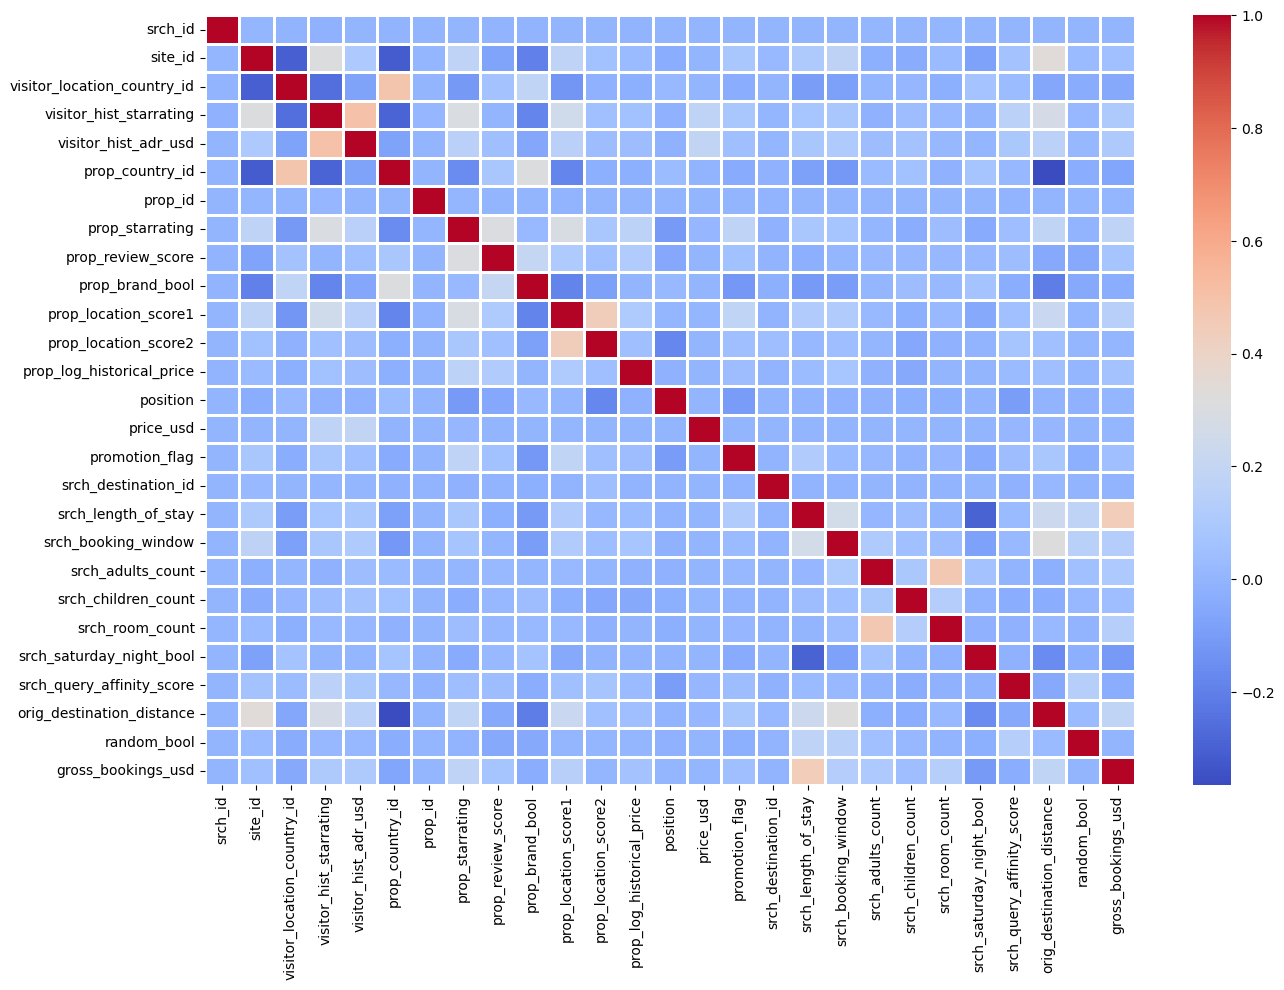

In [8]:
df_corr = df[['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'gross_bookings_usd', 'click_bool', 
       'booking_bool']]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df_corr.corr(),cmap='coolwarm',ax=ax,annot=False,linewidths=2)

In [13]:
cols_to_select = df_corr.columns[(df_corr.abs() > 0.2).any()]

print(cols_to_select)

# loop through all pairs of columns in cols_to_select and print the correlation coefficient
for i in range(len(cols_to_select)):
    for j in range(i+1, len(cols_to_select)):
        col1 = cols_to_select[i]
        col2 = cols_to_select[j]
        corr_coef = df[col1].corr(df[col2])
        if abs(corr_coef) > 0.2:
            print(f"Columns {col1} and {col2} have a correlation coefficient of {corr_coef:.2f}")


Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'gross_bookings_usd'],
      dtype='object')
Columns site_id and visitor_location_country_id have a correlation coefficient of -0.31
Columns site_id and visitor_hist_starrating have a correlation coefficient of 0.31
Columns site_id and prop_country_id have a correlation coefficient of -0.31
Columns site_id and orig_destination_distance have a correlation coefficient of 0.34
Columns visito

In [9]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


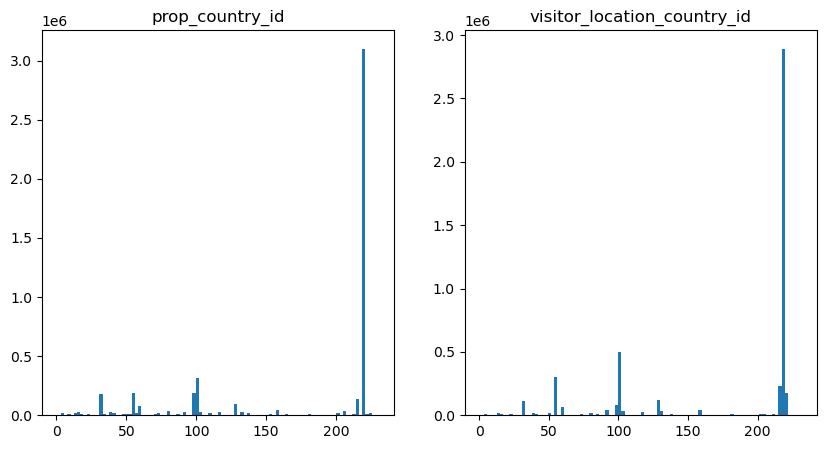

In [23]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create a histogram of the first column in the first subplot
axs[0].hist(df['prop_country_id'], bins = 100)
axs[0].set_title('prop_country_id')

# create a histogram of the second column in the second subplot
axs[1].hist(df['visitor_location_country_id'], bins = 100)
axs[1].set_title('visitor_location_country_id')

# display the plot
plt.show()

HERE ONLY THE BOOKED HOTELS ARE EXPLORED

In [21]:
# create a new dataframe that only includes the rows where booking_bool = 1
bookings_df = df[df['booking_bool'] == 1]

bookings_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
12,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,68914,2,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,11.0,1,114.29,1
63,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,104251,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,162.38,1
68,8,2013-03-20 17:50:44,5,219,NaN,NaN,219,27669,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.41,1
194,21,2013-02-18 17:16:25,15,55,NaN,NaN,216,61662,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222.58,1
211,25,2012-12-11 13:03:42,5,219,NaN,NaN,219,23228,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,47.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958241,332776,2012-11-17 10:02:22,5,32,5.0,321.49,55,106758,4,4.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,428.84,1
4958275,332781,2013-03-03 15:12:59,5,219,NaN,NaN,219,18007,3,3.5,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,129.94,1
4958304,332782,2012-11-08 18:24:21,19,158,NaN,NaN,158,68398,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,288.25,1
4958321,332784,2013-06-18 14:35:24,24,219,NaN,NaN,100,34966,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,301.40,1


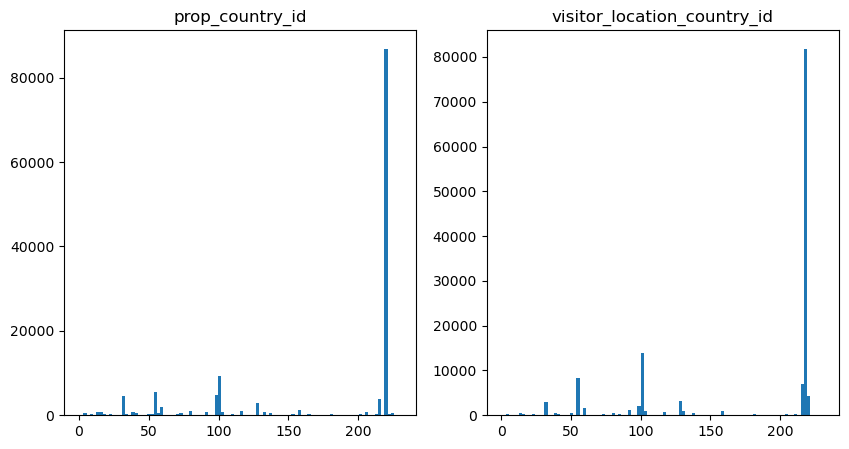

In [24]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create a histogram of the first column in the first subplot
axs[0].hist(bookings_df['prop_country_id'], bins = 100)
axs[0].set_title('prop_country_id')

# create a histogram of the second column in the second subplot
axs[1].hist(bookings_df['visitor_location_country_id'], bins = 100)
axs[1].set_title('visitor_location_country_id')

# display the plot
plt.show()

<AxesSubplot:>

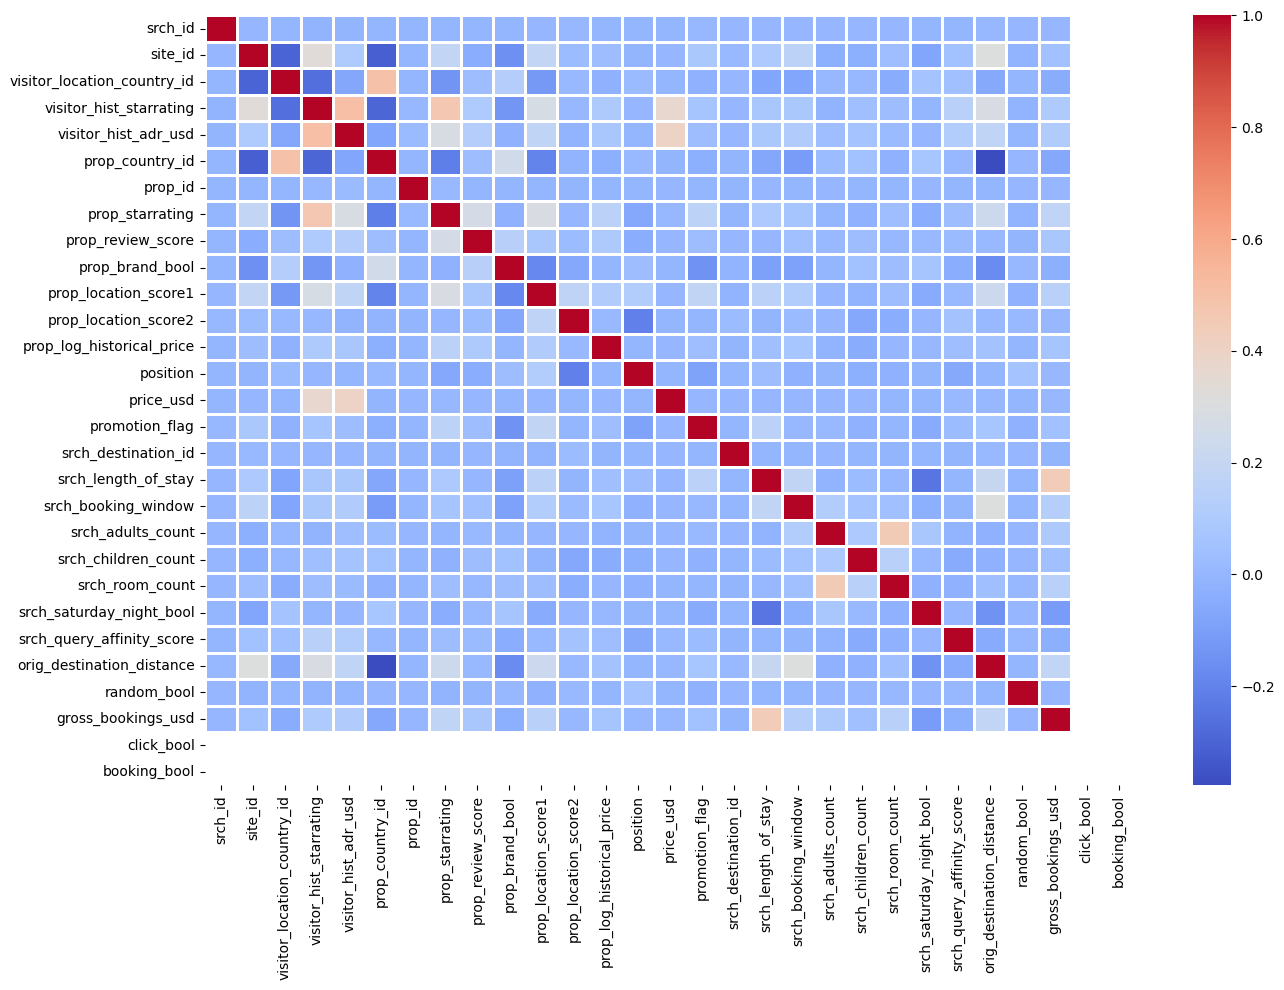

In [26]:
df_corr2 = bookings_df[['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'gross_bookings_usd', 'click_bool', 
       'booking_bool']]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df_corr2.corr(),cmap='coolwarm',ax=ax,annot=False,linewidths=2)